#### Project 4: Netflix NLP
#### Corey J Sinnott
# Modeling and Classification

## Executive Summary

This report was commissioned to perform natural language processing (NLP) and analysis on Netflix movies and television shows. Data includes a description of 7778 titles available on the platform during a time period in 2019. The problem statement was defined as, can we determine if a show or movie has adult content based on the description? For the purpose of this analysis, "adult content" will include any media that has a rating of R, TV-MA, or NC-17. After in-depth analysis, conclusions and recommendations will be presented.

*See 04_model_exec_summary_p4_csinnott.ipynb for the full summary, data dictionary, and findings.*

## Contents:
- [EDA](#Initial-EDA-&-Cleaning)
- [Data Visualization](#Data-Visualization)

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import language_tool_python
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Blobber
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

#### Reading-in Data

In [11]:
df_original = pd.read_csv('./data/netflix_titles.csv')

In [2]:
df = pd.read_csv('./data/netflix_prepped_df.csv')

In [4]:
df = df.set_index(keys = 'title')

In [21]:
df = df.dropna()

In [6]:
df.sample(1)

,type,country,rating,duration,listed_in,description,description_length,description_word_count,descr_polarity,descr_subjectivity
title,,,,,,,,,,
Kapoor & Sons,Movie,India,0.0,138,"Comedies, Dramas, International Movies","Returning home to visit their ill grandfather,...",145,20,-0.5,1.0


#### Exploring the Data

In [9]:
df.sort_values(by = ['descr_polarity']).tail(5)

,type,country,rating,duration,listed_in,description,description_length,description_word_count,descr_polarity,descr_subjectivity
title,,,,,,,,,,
What If?,TV Show,NaN,0.0,1,"International TV Shows, TV Dramas",Four individuals at a crossroads in life are g...,121,23,1.0,0.3
Once Upon a Time in London,Movie,United Kingdom,1.0,111,"Dramas, International Movies","Organized crime came to London in the 1930s, u...",138,22,1.0,1.0
Ninja Assassin,Movie,"Germany, United States, France",1.0,99,Action & Adventure,When his best friend is murdered by the shadow...,116,21,1.0,0.3
My Little Pony Friendship Is Magic: Best Gift Ever,Movie,United States,0.0,44,Children & Family Movies,The ponies get in the spirit of the holidays b...,144,26,1.0,1.0
Dancing with the Birds,Movie,United States,0.0,52,Documentaries,From ruffling their majestic feathers to naili...,151,23,1.0,0.3


In [12]:
df.sort_values(by = ['descr_subjectivity']).tail(5)

,type,country,rating,duration,listed_in,description,description_length,description_word_count,descr_polarity,descr_subjectivity
title,,,,,,,,,,
H2O: Just Add Water,TV Show,Australia,0.0,3,"Kids' TV, TV Dramas",The gals in this fantasy series cope with the ...,148,26,0.0,1.0
Arrested Development,TV Show,United States,1.0,5,TV Comedies,It's the Emmy-winning story of a wealthy famil...,134,25,0.5,1.0
Héroes,Movie,Chile,1.0,91,"Comedies, International Movies","When an earthquake hits Chile, rescue workers ...",132,21,-1.0,1.0
Heartbreakers,Movie,United States,0.0,124,"Comedies, Romantic Movies","In this stylish comedy, a mother-daughter con ...",130,21,0.5,1.0
The Aerial,Movie,Argentina,1.0,99,"Dramas, International Movies, Sci-Fi & Fantasy","In the City Without a Voice, only faceless sin...",220,40,0.0,1.0


In [13]:
df.sort_values(by = ['descr_polarity']).describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7780.0,0.453856,0.497898,0.0,0.00000,0.000000,1.000000,1.0
duration,7787.0,69.122769,50.950743,1.0,2.00000,88.000000,106.000000,312.0
description_length,7787.0,143.100424,10.614146,61.0,140.00000,146.000000,149.000000,248.0
description_word_count,7787.0,23.826506,2.863237,10.0,22.00000,24.000000,26.000000,48.0
descr_polarity,7787.0,0.063070,0.263157,-1.0,-0.05229,0.025000,0.212500,1.0
descr_subjectivity,7787.0,0.450778,0.275302,0.0,0.26250,0.466667,0.633333,1.0


In [14]:
df.sort_values(by = ['descr_subjectivity']).describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7780.0,0.453856,0.497898,0.0,0.00000,0.000000,1.000000,1.0
duration,7787.0,69.122769,50.950743,1.0,2.00000,88.000000,106.000000,312.0
description_length,7787.0,143.100424,10.614146,61.0,140.00000,146.000000,149.000000,248.0
description_word_count,7787.0,23.826506,2.863237,10.0,22.00000,24.000000,26.000000,48.0
descr_polarity,7787.0,0.063070,0.263157,-1.0,-0.05229,0.025000,0.212500,1.0
descr_subjectivity,7787.0,0.450778,0.275302,0.0,0.26250,0.466667,0.633333,1.0


In [18]:
df[df['type'] == 'Movie'].describe().T 

,count,mean,std,min,25%,50%,75%,max
rating,5372.0,0.467424,0.498984,0.0,0.000000,0.000000,1.000,1.0
duration,5377.0,99.307978,28.530881,3.0,86.000000,98.000000,114.000,312.0
description_length,5377.0,143.452297,11.028103,61.0,140.000000,146.000000,149.000,248.0
description_word_count,5377.0,24.004835,2.888100,10.0,22.000000,24.000000,26.000,48.0
descr_polarity,5377.0,0.052384,0.259613,-1.0,-0.066667,0.000000,0.200,1.0
descr_subjectivity,5377.0,0.440051,0.273925,0.0,0.250000,0.454545,0.625,1.0


In [19]:
df[df['type'] == 'TV Show'].describe().T 

,count,mean,std,min,25%,50%,75%,max
rating,2408.0,0.423588,0.494229,0.0,0.000000,0.000000,1.000000,1.0
duration,2410.0,1.775934,1.596359,1.0,1.000000,1.000000,2.000000,16.0
description_length,2410.0,142.315353,9.582318,82.0,139.000000,146.000000,149.000000,243.0
description_word_count,2410.0,23.428631,2.766417,12.0,22.000000,24.000000,25.000000,35.0
descr_polarity,2410.0,0.086911,0.269428,-1.0,-0.033333,0.050000,0.250000,1.0
descr_subjectivity,2410.0,0.474711,0.276913,0.0,0.300000,0.491667,0.662187,1.0


#### Exploring Word Counts

In [30]:
descriptions = df['description']

In [35]:
cvzr = CountVectorizer(stop_words = 'english', max_features = 200)

word_counts = cvzr.fit_transform(descriptions)

counts = pd.DataFrame(word_counts.toarray(),
                      columns=cvzr.get_feature_names())
counts.head(1)

In [48]:
counts.sum().sort_values(ascending = False).head(10)

life       693
young      621
new        579
family     523
man        464
world      461
love       413
woman      404
friends    335
series     312
dtype: int64

In [56]:
cvzr_bi = CountVectorizer(stop_words = 'english', 
                          max_features = 100, ngram_range=(2,2))

word_counts_bi = cvzr_bi.fit_transform(descriptions)

counts_bi = pd.DataFrame(word_counts_bi.toarray(),
                      columns=cvzr_bi.get_feature_names())
counts_bi.head(1)

,10 year,19th century,african american,anthology series,arranged marriage,award winning,based true,best friend,best friends,big city,...,years later,york city,young boy,young couple,young girl,young man,young men,young son,young woman,young women
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
counts_bi.sum().sort_values(ascending = False).head(10)

high school    129
year old       123
young man       97
young woman     93
new york        84
small town      59
best friend     50
true story      47
world war       44
based true      42
dtype: int64

In [58]:
cvzr_tri = CountVectorizer(stop_words = 'english', 
                          max_features = 100, ngram_range=(3,3))

word_counts_tri = cvzr_tri.fit_transform(descriptions)

counts_tri = pd.DataFrame(word_counts_tri.toarray(),
                      columns=cvzr_tri.get_feature_names())
counts_tri.head(1)

,10 year old,11 year old,12 year old,13 year old,14 year old,15 year old,16 year old,17 year old,18 year old,25 year old,...,wide range topics,world war ii,year old boy,year old daughter,year old girl,year old man,year old son,young man falls,young man finds,young woman tries
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
counts_tri.sum().sort_values(ascending = False).head(10)

world war ii            36
new york city           35
based true story        24
based true events       16
10 year old             12
11 year old             11
year old girl           10
inspired true events     8
dreams come true         8
17 year old              8
dtype: int64

# Data Visualization

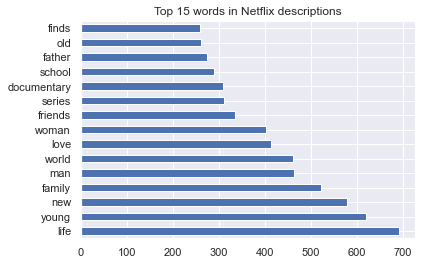

In [64]:
sns.set(style="darkgrid", context="notebook")

counts.sum().sort_values(ascending = False).head(15).plot(kind = 'barh').set_title("Top 15 words in Netflix descriptions");

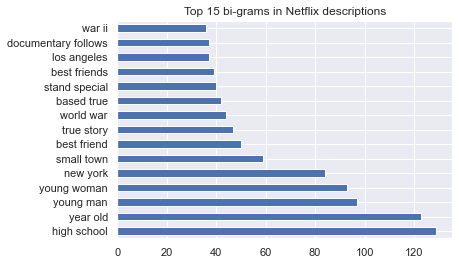

In [65]:
counts_bi.sum().sort_values(ascending = False).head(15).plot(kind = 'barh').set_title("Top 15 bi-grams in Netflix descriptions");

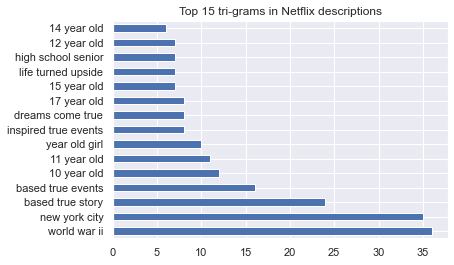

In [66]:
counts_tri.sum().sort_values(ascending = False).head(15).plot(kind = 'barh').set_title("Top 15 tri-grams in Netflix descriptions");

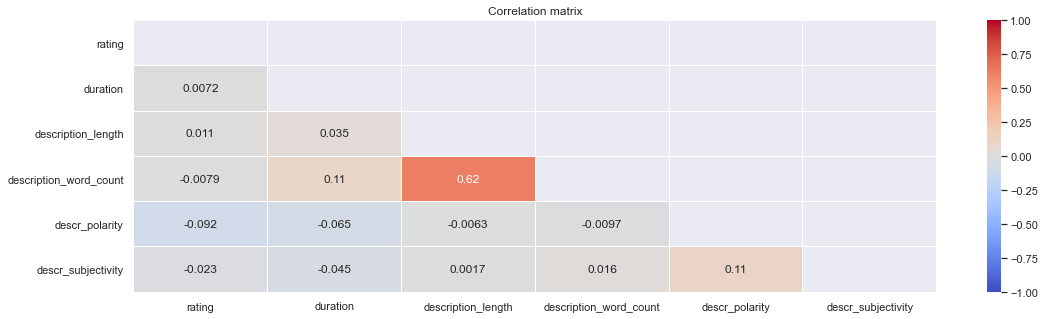

In [71]:
import matplotlib.pyplot as plt
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18, 5))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.01
)
plt.title('Correlation matrix');
